In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Drop irrelevant columns
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True, errors='ignore')

# Fill missing numeric values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Fill missing categorical values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical columns
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])          # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2

# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # ✅ now only numeric columns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# ---------------- Part 3: Train Models ----------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


Logistic Regression Accuracy: 0.8044692737430168
Random Forest Accuracy: 0.8156424581005587
KNN Accuracy: 0.7988826815642458


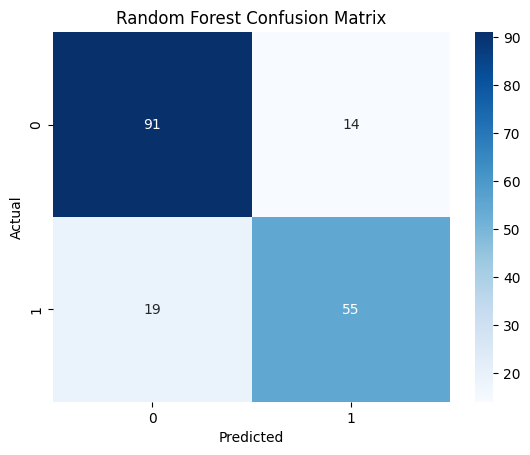

In [ ]:
# ---------------- Part 4: Model Evaluation ----------------
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy Scores
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

# Confusion Matrix for Random Forest
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-2448516107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


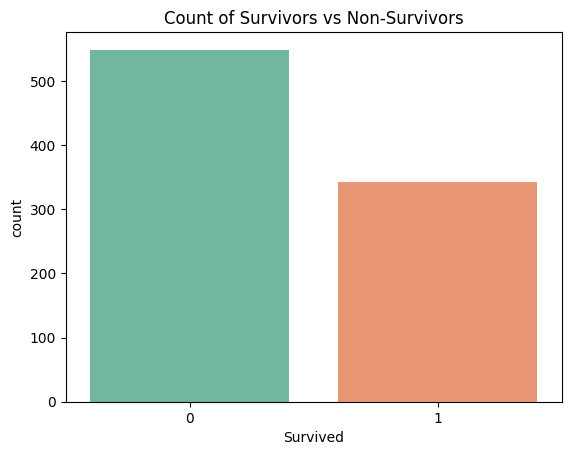

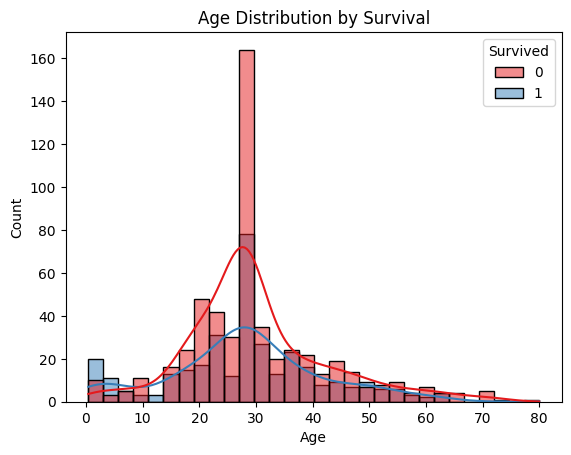

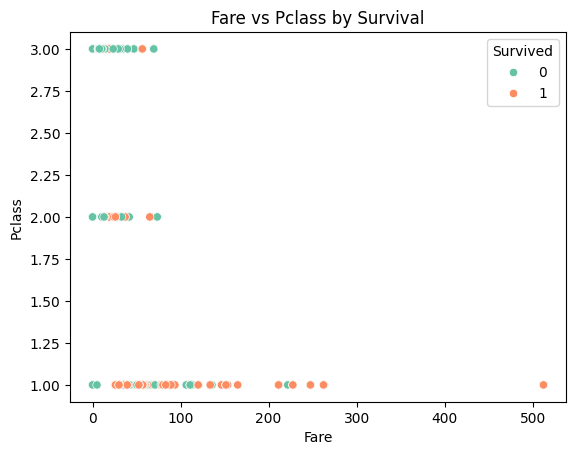

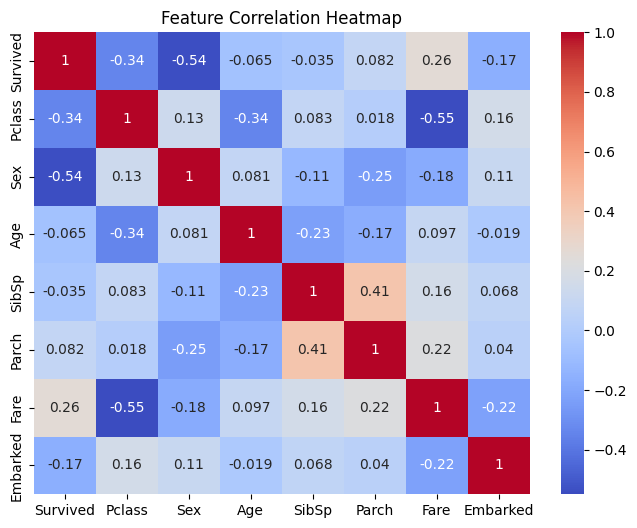

In [ ]:
# ---------------- Part 5: EDA & Visualization ----------------
# Countplot of Survival
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title("Count of Survivors vs Non-Survivors")
plt.show()

# Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30, palette='Set1')
plt.title("Age Distribution by Survival")
plt.show()

# Fare vs Pclass scatter
sns.scatterplot(data=df, x='Fare', y='Pclass', hue='Survived', palette='Set2')
plt.title("Fare vs Pclass by Survival")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
